# Run SurvTRACE on GBSG dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os, sys
sys.path.append(os.path.abspath('../SurvTRACE'))

In [3]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'gbsg'

seed = STConfig['seed'] # 1234
#seed = 42

set_random_seed(seed)

hparams = {
    'batch_size': 64,
    'weight_decay': 0,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [4]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

use pytorch-cuda for training.
[Train-0]: 39.750836968421936
[Val-0]: 1.430763840675354
[Train-1]: 30.77250039577484
[Val-1]: 1.3748854398727417
[Train-2]: 27.913107752799988
[Val-2]: 1.3679455518722534
[Train-3]: 27.77131462097168
[Val-3]: 1.3514004945755005
[Train-4]: 27.594568848609924
[Val-4]: 1.3398962020874023
[Train-5]: 27.405004382133484
[Val-5]: 1.316502332687378
[Train-6]: 27.383405804634094
[Val-6]: 1.3220163583755493
EarlyStopping counter: 1 out of 5
[Train-7]: 27.330041527748108
[Val-7]: 1.3244298696517944
EarlyStopping counter: 2 out of 5
[Train-8]: 27.199955224990845
[Val-8]: 1.3601561784744263
EarlyStopping counter: 3 out of 5
[Train-9]: 27.118715286254883
[Val-9]: 1.3365825414657593
EarlyStopping counter: 4 out of 5
[Train-10]: 27.14840805530548
[Val-10]: 1.3214644193649292
EarlyStopping counter: 5 out of 5
early stops at epoch 11


In [5]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test), confidence=.95, nb_bootstrap=100)
print("done")

******************************
start evaluation
******************************
C-td:  0.4247939814682985
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7436168758970717
Brier Score: 0.10970199261420499
Dynamic AUC:  0.7584685172988009
For 0.5 quantile,
TD Concordance Index - IPCW: 0.690416666647518
Brier Score: 0.18744408833018902
Dynamic AUC:  0.7171281943374926
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6776205079591067
Brier Score: 0.22069595260174232
Dynamic AUC:  0.7091086719460544
C-td:  0.44431790937425075
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7409124176935812
Brier Score: 0.09803898928575118
Dynamic AUC:  0.7566987993977856
For 0.5 quantile,
TD Concordance Index - IPCW: 0.695982519753807
Brier Score: 0.1810379200870487
Dynamic AUC:  0.7171042466582866
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6794881176934613
Brier Score: 0.21637971698928907
Dynamic AUC:  0.7143133536090944
C-td:  0.4425972767245048
For 0.25 quantile,
TD Concordance Index - IPCW: 0

For 0.25 quantile,
TD Concordance Index - IPCW: 0.7397211336956261
Brier Score: 0.1091257369069464
Dynamic AUC:  0.755308515167075
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6893428782099501
Brier Score: 0.18750351253227207
Dynamic AUC:  0.7082750399449038
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6835998936918839
Brier Score: 0.20958572928511296
Dynamic AUC:  0.7329467426651103
C-td:  0.43041613433108233
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7707872833657121
Brier Score: 0.11113839459075517
Dynamic AUC:  0.7924879648997281
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7102302012778277
Brier Score: 0.18544498959470465
Dynamic AUC:  0.735969703293537
For 0.75 quantile,
TD Concordance Index - IPCW: 0.7004054819927599
Brier Score: 0.21479322541885024
Dynamic AUC:  0.7473297672254398
C-td:  0.4480159978163218
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7585212025800484
Brier Score: 0.09207765105715945
Dynamic AUC:  0.7685532321911077
For 0.5 quantile,
TD 

For 0.25 quantile,
TD Concordance Index - IPCW: 0.7674850406967567
Brier Score: 0.09793453631692536
Dynamic AUC:  0.7810254616154559
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6947824773099831
Brier Score: 0.18003441303321133
Dynamic AUC:  0.7109380451995401
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6901024882484793
Brier Score: 0.217047623282023
Dynamic AUC:  0.7298824000536177
C-td:  0.4748339574549313
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7841062963684116
Brier Score: 0.0923808812038718
Dynamic AUC:  0.7955298651306278
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7299020118249976
Brier Score: 0.16842652301833605
Dynamic AUC:  0.7566115837676507
For 0.75 quantile,
TD Concordance Index - IPCW: 0.7035129210901294
Brier Score: 0.20848793359957676
Dynamic AUC:  0.747197194859484
C-td:  0.41917107001321
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7537086015751034
Brier Score: 0.10990320312801208
Dynamic AUC:  0.7661963554075428
For 0.5 quantile,
TD Conc

For 0.25 quantile,
TD Concordance Index - IPCW: 0.7572345792580769
Brier Score: 0.10660304976982193
Dynamic AUC:  0.7750648175254369
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7258643653796873
Brier Score: 0.16995801237106803
Dynamic AUC:  0.7566753607371244
For 0.75 quantile,
TD Concordance Index - IPCW: 0.7012652826686768
Brier Score: 0.21130643540216282
Dynamic AUC:  0.7356671362572051
C-td:  0.3933314641138469
For 0.25 quantile,
TD Concordance Index - IPCW: 0.719713964025561
Brier Score: 0.1219685552362016
Dynamic AUC:  0.7333433440895423
For 0.5 quantile,
TD Concordance Index - IPCW: 0.677216149623575
Brier Score: 0.19480483428987366
Dynamic AUC:  0.6970336251958718
For 0.75 quantile,
TD Concordance Index - IPCW: 0.666392550226869
Brier Score: 0.22032574892551327
Dynamic AUC:  0.7080492484722594
C-td:  0.40922113595416015
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7929882204114289
Brier Score: 0.1030812336797122
Dynamic AUC:  0.8134390201892107
For 0.5 quantile,
TD Co

For 0.25 quantile,
TD Concordance Index - IPCW: 0.7635833741464301
Brier Score: 0.10595392603771212
Dynamic AUC:  0.7758146985577385
For 0.5 quantile,
TD Concordance Index - IPCW: 0.7039829966900824
Brier Score: 0.192636156035096
Dynamic AUC:  0.7235595549716505
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6894490742262469
Brier Score: 0.2138326483981512
Dynamic AUC:  0.7265758950998752
C-td:  0.4273749758640664
For 0.25 quantile,
TD Concordance Index - IPCW: 0.7088275961450848
Brier Score: 0.1024915291928038
Dynamic AUC:  0.7216066590530594
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6701038577979769
Brier Score: 0.18109524792185264
Dynamic AUC:  0.6931542701545151
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6711668992621894
Brier Score: 0.2141647307604042
Dynamic AUC:  0.7092862975872123
C-td:  0.4685129118432769
For 0.25 quantile,
TD Concordance Index - IPCW: 0.734500095388033
Brier Score: 0.09839202807466589
Dynamic AUC:  0.7484431806494443
For 0.5 quantile,
TD Conc

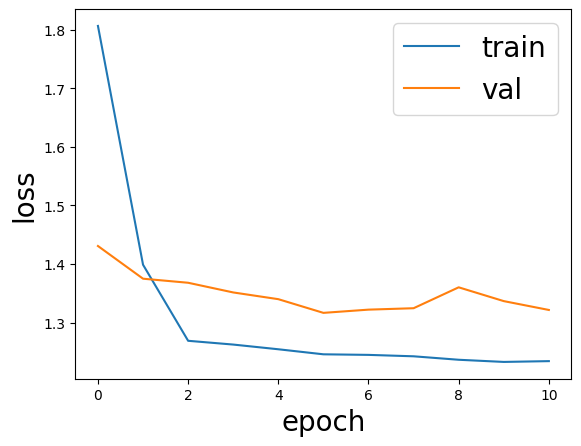

In [6]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()